# APR - 5. domaća zadaća - ak. god. 2018./2019.

## Domaća zadaća

U okviru ove zadaće potrebno je ostvariti metode numeričke integracije po postupku Runge-Kutta 4. reda (u
skripti: str. 7-35) te trapeznom postupku. Sustav je općenitog oblika x = Ax + B . Program treba (iz
datoteka) učitavati matrice linearnog sustava diferencijalnih jednadžbi ( A i B ) te početno stanje x  t  0  .
Za uporabu trapeznog postupka potrebno je zadani linearni sustav prethodno transformirati u eksplicitni
oblik (skripta 7-24, 25).

Za izvedbu trapeznog postupka potrebno je razredu Matrica iz prve vježbe dodati metodu koja računa
inverziju kvadratne matrice (uz pomoć LUP dekompozicije). Inverzna matrica se računa stupac po
stupac, s jednom LUP dekompozicijom i n supstitucija unaprijed i unatrag, kako je pokazano na
predavanjima (u skripti: str. 3-30). Metoda se može definirati kao unarni operator nad matricom. Posebnu
pažnju obratiti na slučaj kada je matrica singularna (pojava nule za stožerni element).

Potrebno je bez prevođenja programa omogućiti zadavanje željenog koraka integracije (T) i vremenskog
intervala za koji se provodi postupak [0, tmax]. Program treba rješavati sustav po odabranom ili oba zadana
postupka te prilikom rada ispisivati varijable stanja na ekran, no ne u svakoj iteraciji nego svakih nekoliko
iteracija (omogućiti da taj broj zadaje korisnik). Osim na ekran, ispis je uputno preusmjeriti i u datoteku.
Nakon završetka postupka potrebno je grafički prikazati kretanje varijabli stanja za oba postupka
izračunavanja (vodoravna os je vrijeme, uspravna su vrijednosti varijabli stanja). Crtanje se može izvesti
bilo kakvim alatom, npr. čitanjem izračunatih vrijednosti iz datoteke.

## Laboratorijska vježba

In [2]:
import src.linear as linear
import matplotlib.pyplot as plt
import sys

### 1. zadatak
Korištenjem LUP dekompozicije izračunajte inverzzadane matrice te ispišite dobiveni rezultat:

![prvi](res/img/1.png)

In [3]:
A = linear.Matrix(array=[[1, 2, 3], [4, 5, 6], [7, 8 , 9]])

try:
    print(A.inverse())
except TypeError as e:
    print(str(e), file=sys.stderr)

Cannot find inverse, matrix is singular.


### 2. zadatak
Korištenjem LUP dekompozicije izračunajte inverz zadane matrice te ispišite dobiveni rezultat:

![drugi](res/img/2.png)

In [4]:
A = linear.Matrix(array=[[4, -5, -2], [5, -6, -2], [-8, 9, 3]])

print("inv(A):")
print(str(A.inverse()))

inv(A):
-0.0 -3.0 -2.0
1.0 -4.0 -2.0
-3.0 4.0 1.0



### 3. zadatak
Izračunajte ponašanje sljedećeg sustava za proizvoljne početne vrijednosti:

![treci](res/img/3.png)

Sustav predstavlja matematičko njihalo. x1(t=0) je početni odmak od ravnotežnog položaja a x 2 (t=0)
je početna brzina. Analitičko rješenje sustava je:

![treci2](res/img/3.2.png)

Želimo li npr. dobiti sustav s prigušenjem, element matrice A s indeksom (2,2) treba postaviti na
negativnu vrijednost.

#### 3.1 trapezni postupak

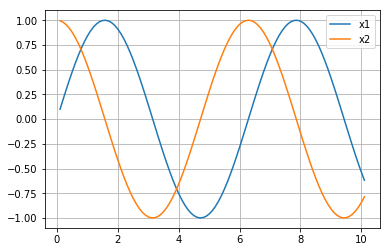

In [5]:
A = linear.Matrix(array=[[0, 1], [-1, 0]])
x = linear.Matrix(array=[[0, 1]])

x1, x2, t = linear.trapese(A, x, 0.1, 10)

plt.plot(t, x1, label='x1')
plt.plot(t, x2, label='x2')
plt.legend(loc='best')
plt.grid()
plt.show()

#### 3.2 Postupak Runge-Kutta

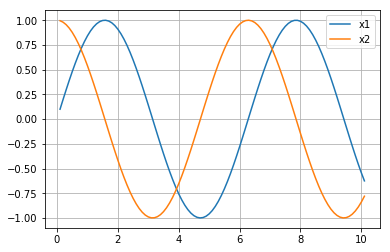

In [6]:
A = linear.Matrix(array=[[0, 1], [-1, 0]])
x = linear.Matrix(array=[[0, 1]])

x1, x2, t = linear.runge_kutta(A, x, 0.1, 10)

plt.plot(t, x1, label='x1')
plt.plot(t, x2, label='x2')
plt.legend(loc='best')
plt.grid()
plt.show()

### 4. zadatak
Izračunajte ponašanje sljedećeg sustava:

![cetvrti](res/img/4.png)

Sustav predstavlja fizikalno njihalo s prigušenjem (zadatak s predavanja). Isprobajte rješavanje s
periodom integracije T = 0.1 za oba zadana postupka i obratite pažnju na numeričku stabilnost! (uz
zadane početne uvjete) Uspredbom rezultata odredite prikladni korak integracije za Runge-Kutta
postupak.

#### 4.3 Trapezni postupak

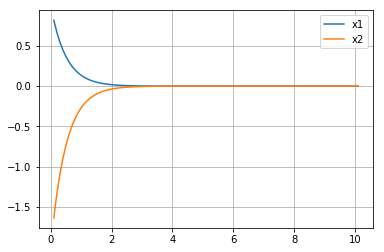

In [7]:
A = linear.Matrix(array=[[0, 1], [-200, -102]])
x = linear.Matrix(array=[[1, -2]])

x1, x2, t = linear.trapese(A, x, 0.1, 10)

plt.plot(t, x1, label='x1')
plt.plot(t, x2, label='x2')
plt.legend(loc='best')
plt.grid()
plt.show()

#### 4.2 Postupak Runge-Kutta

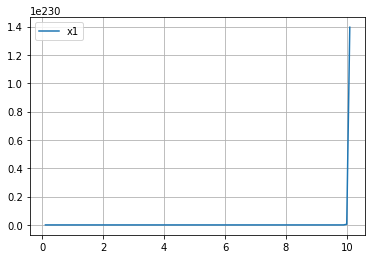

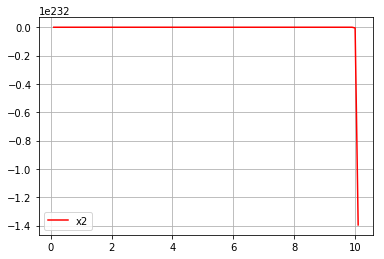

In [9]:
A = linear.Matrix(array=[[0, 1], [-200, -102]])
x = linear.Matrix(array=[[1, -2]])

x1, x2, t = linear.runge_kutta(A, x, 0.1, 10)

plt.plot(t, x1, label='x1')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.plot(t, x2, 'r', label='x2')
plt.legend(loc='best')
plt.grid()
plt.show()